In [9]:
import requests

url = 'https://thumbs.dreamstime.com/b/example-red-tag-example-red-square-price-tag-117502755.jpg'
r = requests.get(url, stream = True).raw

In [10]:
from PIL import Image

In [11]:
img = Image.open(r)
img.show()
img.save('src.png')


In [12]:
print(img.get_format_mimetype)

<bound method ImageFile.get_format_mimetype of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x522 at 0x7FEEEFB8FF10>>


In [15]:
BUF_SIZE = 1024
with open('src.png', 'rb') as sf, open('dst.png', 'wb') as df: #sf 와 df 로 파일 객체를 만든다. 
    while True:
        data = sf.read(BUF_SIZE) #1024 바이트씩 읽는다. 
        if not data:
            break
        df.write(data)


#### 2.8.4 SHA-256 으로 파일 복사 검증하기

해시 값은 특정 파일 둘이 동일한 것인지 아니면 다른 것인지를 판가름 해준다. 

In [19]:
import hashlib

sha_src = hashlib.sha256()
sha_dst = hashlib.sha256()

with open('src.png', 'rb') as sf, open('dst.png', 'rb') as df:
    sha_src.update(sf.read())
    sha_dst.update(df.read())
    
print("src.png's hash : {}".format(sha_src.hexdigest()))
print("dst.png's hash : {}".format(sha_dst.hexdigest()))


src.png's hash : 3211ab561952933151c70f77d8060ee7523e2bc3df91c89282383b6dd7ee24c9
dst.png's hash : 3211ab561952933151c70f77d8060ee7523e2bc3df91c89282383b6dd7ee24c9


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dst_img = mpimg.imread('dst.png')




In [21]:
print(dst_img)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [22]:
pseudo_img = dst_img[:, :, 0]


In [23]:
print(pseudo_img)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


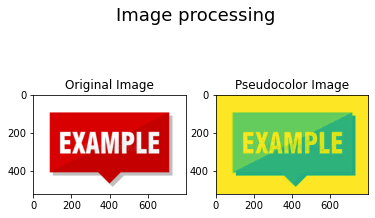

In [27]:
plt.suptitle('Image processing', fontsize = 18)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(mpimg.imread('src.png'))


plt.subplot(122)
plt.title('Pseudocolor Image')
dst_img = mpimg.imread('dst.png')
pseudo_img = dst_img[:,:,0]
plt.imshow(pseudo_img)
plt.show()





##  넘파이 배열 

In [28]:
import numpy as np
A = np.array([[1,2], [3,4]])

In [29]:
A

array([[1, 2],
       [3, 4]])

In [30]:
type(A)

numpy.ndarray

In [31]:
A.ndim

2

In [32]:
print(A.max(), A.mean(), A.min(), A.sum())

4 2.5 1 10


In [33]:
A[0]

array([1, 2])

In [36]:
A[0][1]

2

In [38]:
B = A[A>1]

In [39]:
type(B)

numpy.ndarray

In [40]:
print(B)

[2 3 4]


In [41]:
B.ndim

1

In [42]:
B.shape

(3,)

In [43]:
A

array([[1, 2],
       [3, 4]])

In [44]:
A.T

array([[1, 3],
       [2, 4]])

In [45]:
A.flatten()

array([1, 2, 3, 4])

### 팬더스 시리즈

In [46]:
import pandas as pd
s = pd.Series([0.0, 3.6, 2.0, 5.8, 4.2, 8.0])

In [47]:
s

0    0.0
1    3.6
2    2.0
3    5.8
4    4.2
5    8.0
dtype: float64

In [48]:
s.index = pd.Index([0.0, 1.2, 1.8, 3.0, 3.6, 4.8])
s.index.name = 'MY_IDX'

s

MY_IDX
0.0    0.0
1.2    3.6
1.8    2.0
3.0    5.8
3.6    4.2
4.8    8.0
dtype: float64

In [49]:
s.name = 'MY_SERIES'

In [50]:
s[5.9] = 5.5

In [51]:
s

MY_IDX
0.0    0.0
1.2    3.6
1.8    2.0
3.0    5.8
3.6    4.2
4.8    8.0
5.9    5.5
Name: MY_SERIES, dtype: float64

In [52]:
ser = pd.Series([6.7, 4.2], index = [6.8, 8.0])


In [53]:
s = s.append(ser)

In [54]:
s

0.0    0.0
1.2    3.6
1.8    2.0
3.0    5.8
3.6    4.2
4.8    8.0
5.9    5.5
6.8    6.7
8.0    4.2
dtype: float64

In [55]:
s.describe()

count    9.000000
mean     4.444444
std      2.430078
min      0.000000
25%      3.600000
50%      4.200000
75%      5.800000
max      8.000000
dtype: float64

### data frame 만들기

In [62]:
import pandas as pd

df = pd.DataFrame({'KOSPI': [1915, 1961, 2026, 2467, 2041], 
                   'KOSDAQ': [542, 682, 631, 798, 675]})

In [63]:
df

,KOSPI,KOSDAQ
0,1915,542
1,1961,682
2,2026,631
3,2467,798
4,2041,675


In [64]:
df = pd.DataFrame({'KOSPI': [1915, 1961, 2026, 2467, 2041], 
                   'KOSDAQ': [542, 682, 631, 798, 675]},
                 index = [2014, 2015, 2016, 2017, 2018])

In [65]:
df

,KOSPI,KOSDAQ
2014,1915,542
2015,1961,682
2016,2026,631
2017,2467,798
2018,2041,675


In [66]:
df.describe()

,KOSPI,KOSDAQ
count,5.000000,5.000000
mean,2082.000000,665.600000
std,221.117616,92.683871
min,1915.000000,542.000000
25%,1961.000000,631.000000
50%,2026.000000,675.000000
75%,2041.000000,682.000000
max,2467.000000,798.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2014 to 2018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   KOSPI   5 non-null      int64
 1   KOSDAQ  5 non-null      int64
dtypes: int64(2)
memory usage: 120.0 bytes


In [68]:
import yfinance

In [70]:
import pandas-datareader


SyntaxError: invalid syntax (<ipython-input-70-734c2e4eb9ef>, line 1)

In [74]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


sec = pdr.get_data_yahoo('005930.KS', start='2019-03-06')
msft = pdr.get_data_yahoo('MSFT', start='2019-03-06')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [75]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-06,44000.0,44300.0,43700.0,44000.0,40118.500000,10202544
2019-03-07,43400.0,44950.0,43400.0,44450.0,40528.800781,11049749
2019-03-08,44450.0,44800.0,43800.0,43800.0,39936.140625,7729069
2019-03-11,44400.0,44450.0,43650.0,43650.0,39799.367188,10717408
2019-03-12,44300.0,44950.0,44150.0,44650.0,40711.156250,11431977


In [76]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-06,44000.0,44300.0,43700.0,44000.0,40118.500000,10202544
2019-03-07,43400.0,44950.0,43400.0,44450.0,40528.800781,11049749
2019-03-08,44450.0,44800.0,43800.0,43800.0,39936.140625,7729069
2019-03-11,44400.0,44450.0,43650.0,43650.0,39799.367188,10717408
2019-03-12,44300.0,44950.0,44150.0,44650.0,40711.156250,11431977
2019-03-13,44250.0,44450.0,43700.0,43850.0,39981.726562,8108343
2019-03-14,43700.0,44300.0,43550.0,43850.0,39981.726562,18039161
2019-03-15,43800.0,44250.0,43700.0,44200.0,40300.851562,16814163
2019-03-18,43950.0,44150.0,43450.0,43700.0,39844.968750,8188876


In [78]:
tmp_msft = msft.drop(columns = 'Volume')

In [81]:
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-02-28,294.309998,299.140015,293.000000,298.790009,298.790009
2022-03-01,296.399994,299.970001,292.149994,294.950012,294.950012
2022-03-02,295.359985,301.470001,293.700012,300.190002,300.190002
2022-03-03,302.890015,303.130005,294.049988,295.920013,295.920013
2022-03-04,294.290009,295.660004,287.170013,289.859985,289.859985


msft

In [80]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-05,112.250000,112.389999,111.230003,111.699997,108.250671,19538300
2019-03-06,111.870003,112.660004,111.430000,111.750000,108.299141,17687000
2019-03-07,111.400002,111.550003,109.870003,110.389999,106.981133,25339000
2019-03-08,109.160004,110.709999,108.800003,110.510002,107.097435,22818400
2019-03-11,110.989998,112.949997,110.980003,112.830002,109.345787,26491600
...,...,...,...,...,...,...
2022-02-28,294.309998,299.140015,293.000000,298.790009,298.790009,34585700
2022-03-01,296.399994,299.970001,292.149994,294.950012,294.950012,31217800
2022-03-02,295.359985,301.470001,293.700012,300.190002,300.190002,31873000


In [82]:
sec.index

DatetimeIndex(['2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11',
               '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15',
               '2019-03-18', '2019-03-19',
               ...
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07'],
              dtype='datetime64[ns]', name='Date', length=742, freq=None)

In [84]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


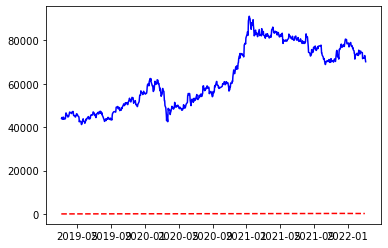

In [90]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


sec = pdr.get_data_yahoo('005930.KS', start='2019-03-06')
msft = pdr.get_data_yahoo('MSFT', start='2019-03-06')


import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label = 'Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label = 'Samsung Electronics')


### 일간 변동률로 주가 비교하기

In [91]:
type(sec['Close'])

pandas.core.series.Series

In [92]:
sec['Close']

Date
2019-03-06    44000.0
2019-03-07    44450.0
2019-03-08    43800.0
2019-03-11    43650.0
2019-03-12    44650.0
               ...   
2022-02-28    71900.0
2022-03-02    71700.0
2022-03-03    72900.0
2022-03-04    72900.0
2022-03-07    70100.0
Name: Close, Length: 742, dtype: float64

In [93]:
sec['Close'].shift()

Date
2019-03-06        NaN
2019-03-07    44000.0
2019-03-08    44450.0
2019-03-11    43800.0
2019-03-12    43650.0
               ...   
2022-02-28    71900.0
2022-03-02    71900.0
2022-03-03    71700.0
2022-03-04    72900.0
2022-03-07    72900.0
Name: Close, Length: 742, dtype: float64

In [94]:
sec_dpc = (sec['Close']/sec['Close'].shift(1) - 1)*100

In [95]:
sec_dpc.head()

Date
2019-03-06         NaN
2019-03-07    1.022727
2019-03-08   -1.462317
2019-03-11   -0.342466
2019-03-12    2.290951
Name: Close, dtype: float64

In [96]:
sec_dpc.iloc[0] = 0


In [98]:
sec_dpc.head()

Date
2019-03-06    0.000000
2019-03-07    1.022727
2019-03-08   -1.462317
2019-03-11   -0.342466
2019-03-12    2.290951
Name: Close, dtype: float64

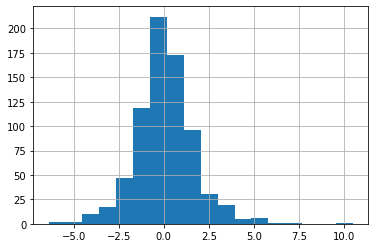

In [104]:


plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [106]:
sec_dpc.describe()

count    742.000000
mean       0.076417
std        1.656806
min       -6.387665
25%       -0.898890
50%        0.000000
75%        0.976007
max       10.470588
Name: Close, dtype: float64

In [110]:
sec_dpc_cs = sec_dpc.cumsum()

In [111]:
sec_dpc_cs

Date
2019-03-06     0.000000
2019-03-07     1.022727
2019-03-08    -0.439590
2019-03-11    -0.782056
2019-03-12     1.508895
                ...    
2022-02-28    59.146892
2022-03-02    58.868728
2022-03-03    60.542368
2022-03-04    60.542368
2022-03-07    56.701490
Name: Close, Length: 742, dtype: float64

2019년 부터 지금까지 누적 이자율은 56.7% 의 흑자를 가져왔다. 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


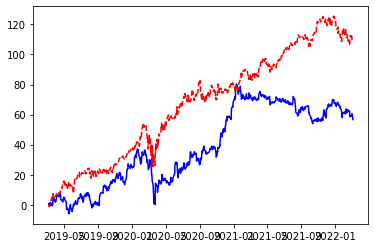

In [113]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


sec = pdr.get_data_yahoo('005930.KS', start='2019-03-06')
sec_dpc = (sec['Close']/sec['Close'].shift(1) - 1)*100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()


msft = pdr.get_data_yahoo('MSFT', start='2017-03-06')
msft_dpc = (msft['Close']/msft['Close'].shift(1) - 1)*100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()


import matplotlib.pyplot as plt

plt.plot(sec.index, sec_dpc_cs, 'b', label = 'Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label = 'Samsung Electronics')


